A = [[ -8. -16.  -6.]
 [  1.   0.   0.]
 [  0.   1.   0.]]

B = [[1.]
 [0.]
 [0.]]

C = [[2. 8. 6.]]

D = [[0.]]

{'RiseTime': 3.6054432977488533, 'SettlingTime': 6.936872904868793, 'SettlingMin': 0.8995272711835318, 'SettlingMax': 0.9994569271945581, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.9994569271945581, 'PeakTime': 14.407351417804417, 'SteadyStateValue': 0.9994569271945581}


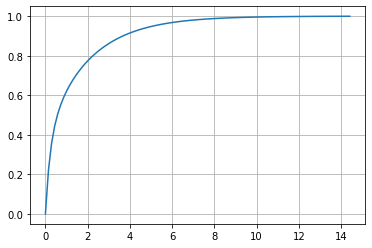

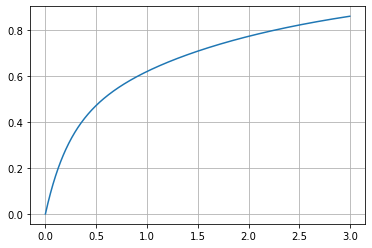

In [1]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-14
# Page 207

import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt

num = np.array([2, 8, 6])
den = np.array([1,8,16,6])
sys_tf = cm.tf(num, den)
sys_ss = cm.ss(sys_tf)
print(sys_ss)

stepinfo = cm.stepinfo(sys_ss)
print(stepinfo)
stepsys2, stepsys1= cm.step(sys_ss)
plt.figure(1)
plt.plot(stepsys1, stepsys2)
plt.grid()
#plt.show()

plt.figure(2)
t = np.arange(0,3,step=0.005)
y, t = cm.step(sys_ss, t)
plt.plot(t, y)
plt.grid()
plt.show()



In [2]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-14
# Page 207

import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg

A = np.array([[0,-2],[1,-3]])
dt = np.array([0.2])
print(A*dt)
Phi = splg.expm(A*dt)

print(Phi)




[[ 0.  -0.4]
 [ 0.2 -0.6]]
[[ 0.96714146 -0.29682141]
 [ 0.14841071  0.52190934]]


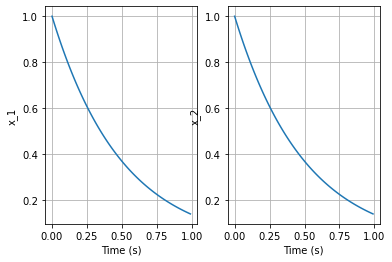

In [3]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-14
# Page 207

import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg

A = np.array([[0,-2],[1,-3]])
B = np.array([[2],[0]])
C = np.array([1,0])
D = np.array([0])
sys = cm.ss(A,B,C,D)
x0 = np.array([1,1])
t = np.arange(0,1,0.01)
u = 0*t
y, T, x = cm.lsim(sys, u, t, x0)

plt.figure(1)
plt.subplot(121)
plt.plot(T,x[:,0])
plt.xlabel('Time (s)')
plt.ylabel('x_1')
plt.grid()
plt.subplot(122)
plt.plot(T,x[:,1])
plt.xlabel('Time (s)')
plt.ylabel('x_2')
plt.grid()
plt.show()



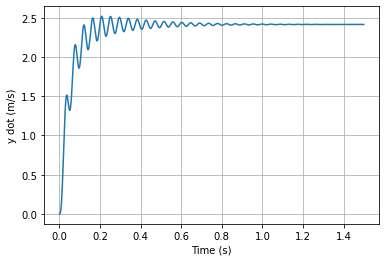

In [4]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-14
# Page 213

import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg

k = 10.0
M1 = 0.02
M2 = 0.0005
b1 = 410.0e-03
b2 = 4.1e-03
t = np.arange(0,1.5,0.001)
A = np.array([[0,0,1,0],[0,0,0,1],[-k/M1,k/M1,-b1/M1,0],[k/M2,-k/M2,0,-b2/M2]])
B = np.array([[0],[0],[1/M1],[0]])
C = np.array([0,0,0,1])
D = np.array([0])
sys = cm.ss(A,B,C,D)
y, t = cm.step(sys, t)
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('y dot (m/s)')
plt.grid()
plt.show()

